In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
df = pd.read_excel(r'C:/Users/Sauyma Gohil/Desktop/Projects/WizTask/Walmart.xlsx')

In [6]:
df.shape

(3203, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   int64         
 11  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 300.4+ KB


In [5]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493233,3.828910,33.849032
std,524.876877,2.260947,174.109081
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.852000
50%,60.840000,3.000000,11.166400
75%,215.809000,5.000000,33.000400
max,13999.960000,14.000000,6719.980800


In [7]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [8]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [27]:
# Group by 'Order Date' and sum the 'Sales'
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Find the date with the highest sales
max_sales_date = daily_sales.loc[daily_sales['Sales'].idxmax()]

print("Date with the highest sales:", max_sales_date['Order Date'])
print("Highest sales amount:", max_sales_date['Sales'])

Date with the highest sales: 2014-03-24 00:00:00
Highest sales amount: 14299.08


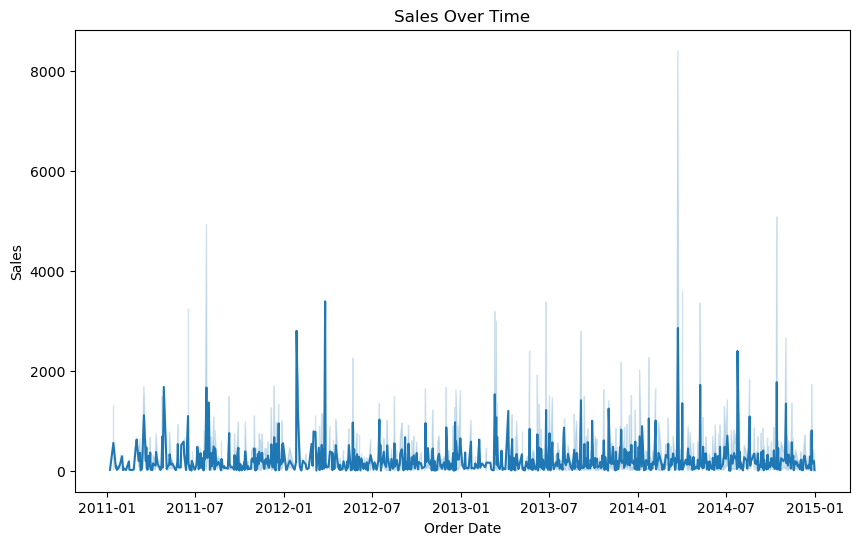

In [9]:
# Sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=df)
plt.title('Sales Over Time')
plt.show()



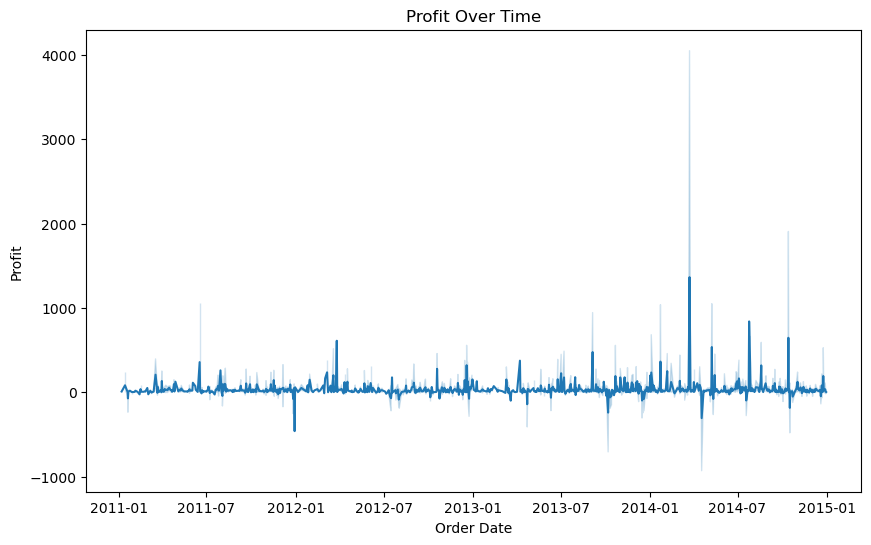

In [10]:
# Profit over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Profit', data=df)
plt.title('Profit Over Time')
plt.show()



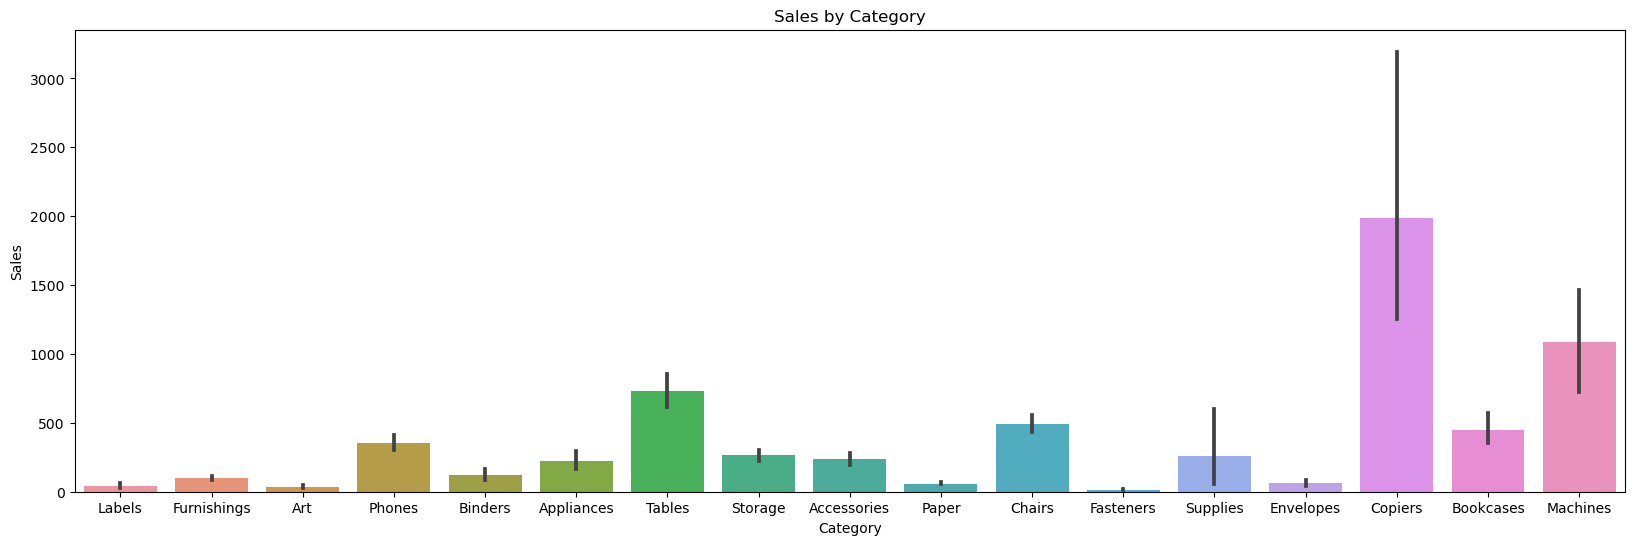

In [12]:
# Sales by category
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()



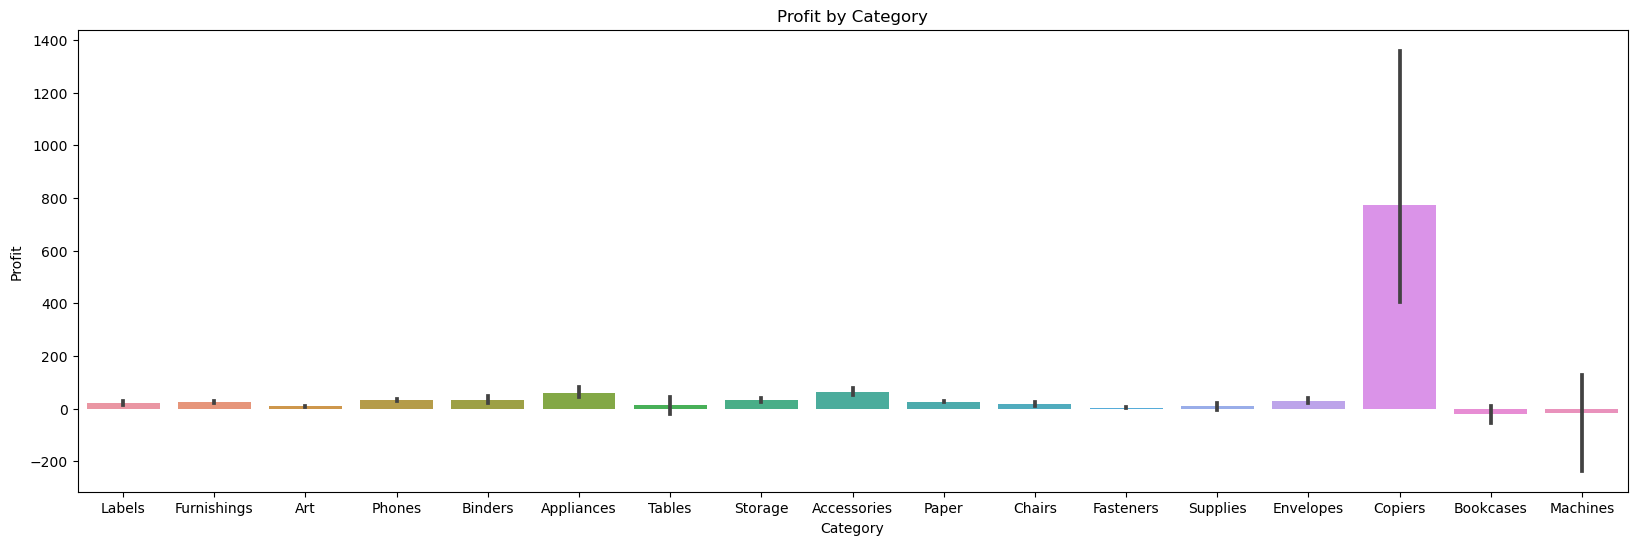

In [14]:
# Profit by category
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Profit by Category')
plt.show()

C:\Users\Sauyma Gohil\AppData\Local\Temp\ipykernel_2980\2218628627.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


             Sales  Quantity    Profit
Sales     1.000000  0.214665  0.647477
Quantity  0.214665  1.000000  0.093240
Profit    0.647477  0.093240  1.000000


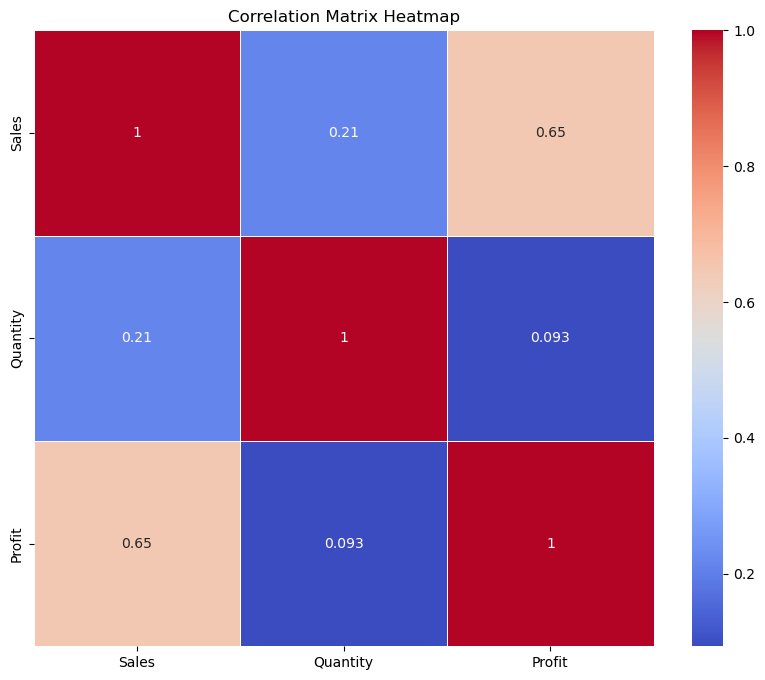

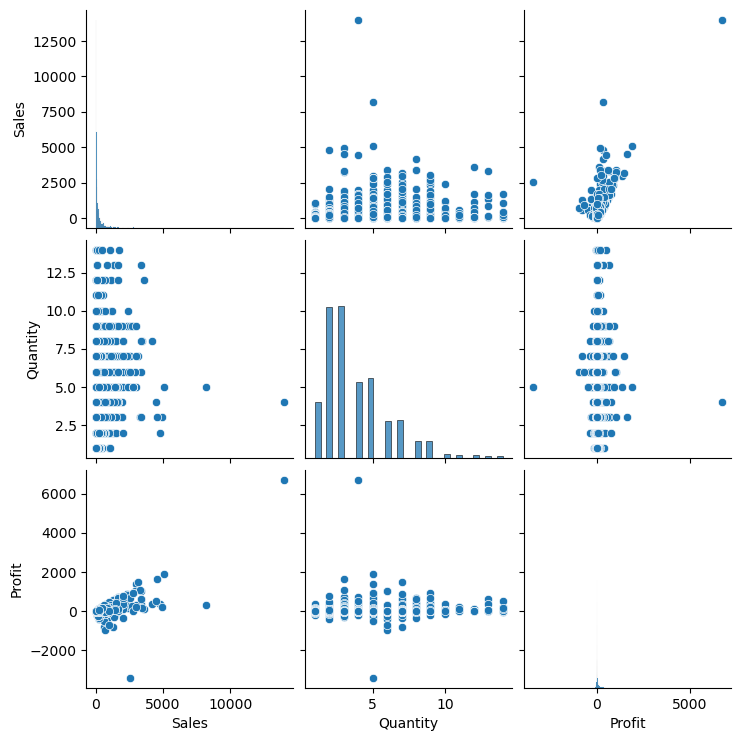

In [15]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot to examine relationships
sns.pairplot(df)
plt.show()


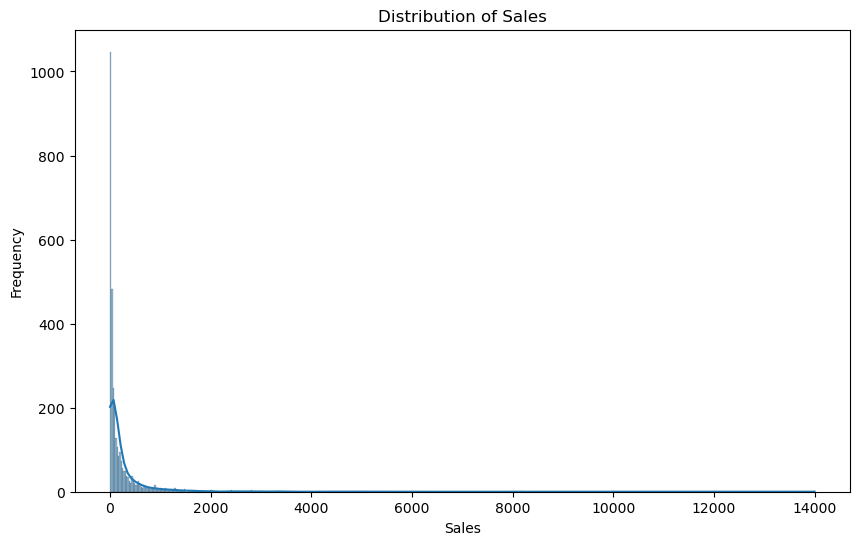

In [16]:


# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



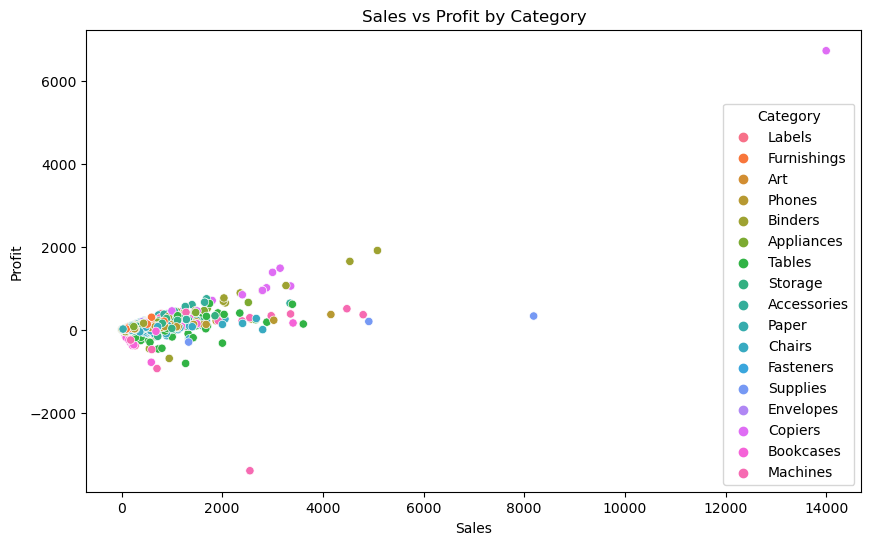

In [17]:
# Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()



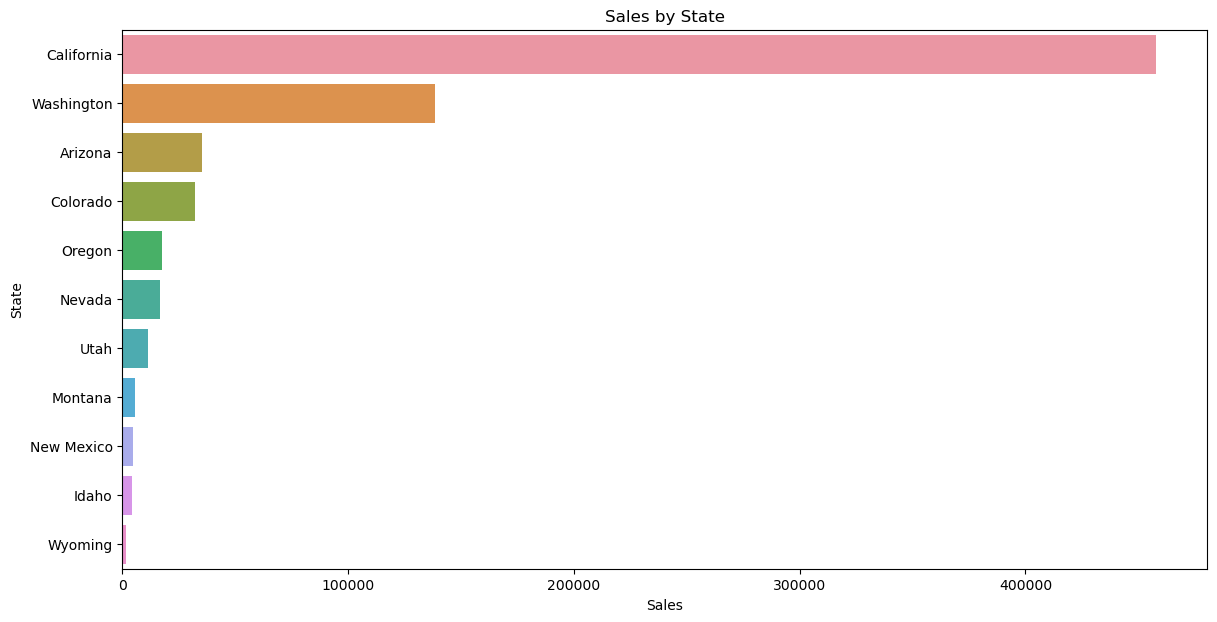

In [19]:
# Sales by State
plt.figure(figsize=(14, 7))
state_sales = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Sales', y='State', data=state_sales)
plt.title('Sales by State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()
